In [5]:
import numpy as np
import matplotlib.pyplot as plt

from import_data import import_dataset

dir_name = "WASK"
X = import_dataset(dir_name)
print(X.shape)

Skip due incorrect format
Skip due incorrect format
(31, 1440)


The first day of the month

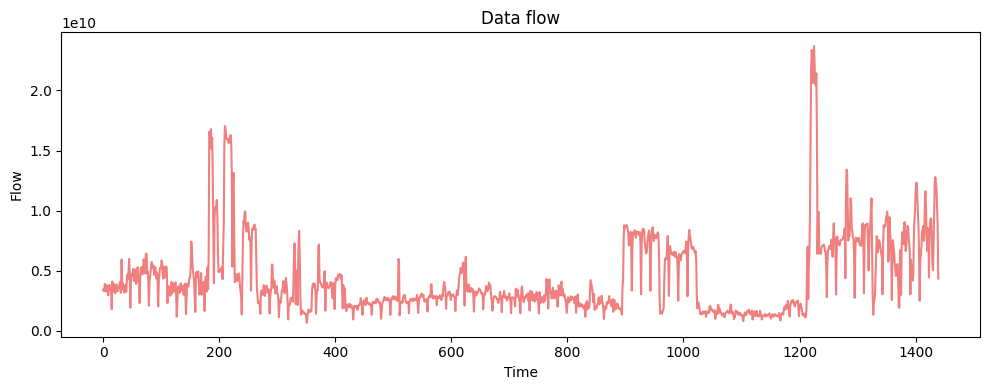

In [6]:
plt.figure(figsize=(10,4))
plt.plot(X[0], color="lightcoral")
plt.title("Data flow")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.tight_layout()
plt.show()

All month in one timeframe

Skip due incorrect format
Skip due incorrect format


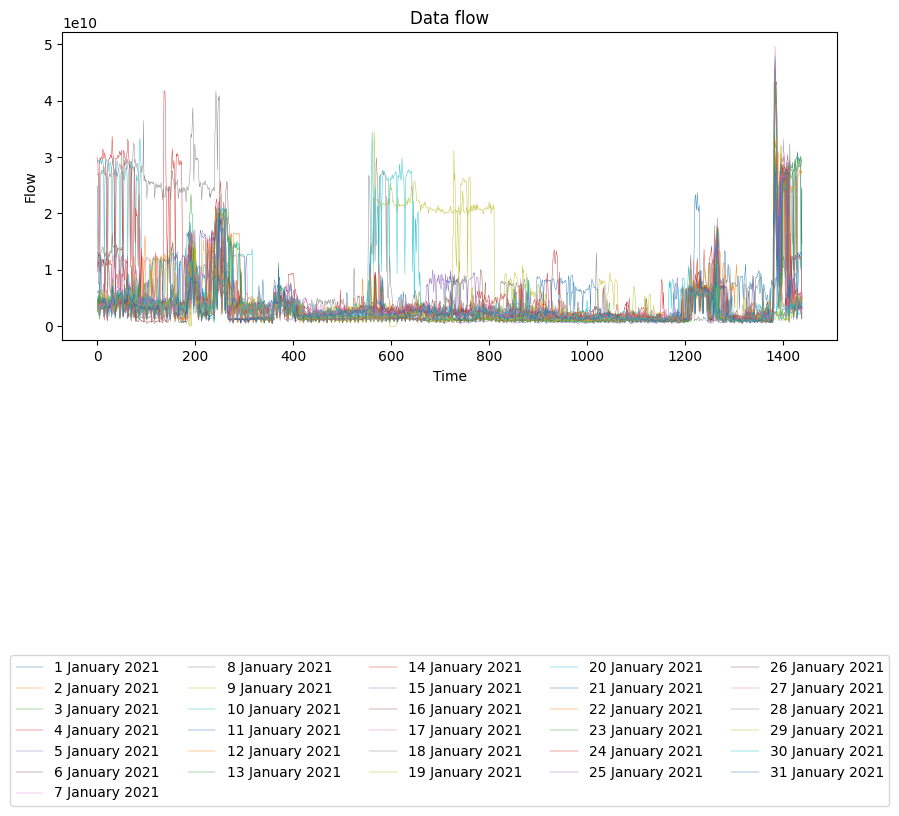

In [7]:
import warnings

dir_name = "WASK"
X = import_dataset(dir_name)

warnings.filterwarnings("ignore")
plt.figure(figsize=(10,4))
for i in range(X.shape[0]):
    plt.plot(X[i], label=f"{i+1} January 2021", linewidth=0.3)
    plt.title("Data flow")
    plt.xlabel("Time")
    plt.ylabel("Flow")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -1), ncol=5)
plt.tight_layout()
plt.show()

All month traffic 

Skip due incorrect format
Skip due incorrect format
(44640, 1)


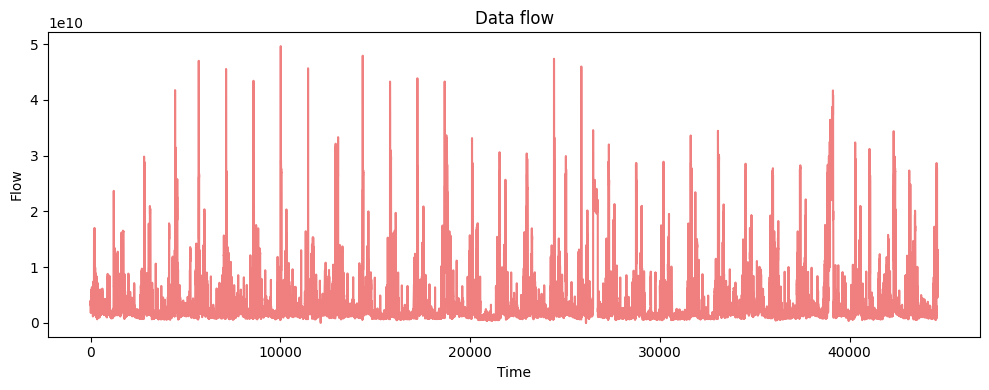

In [8]:
# All month on one image


dir_name = "WASK"
X = import_dataset(dir_name)

X_r = X.reshape(-1, 1)
print(X_r.shape)

plt.figure(figsize=(10,4))
plt.plot(X_r, color="lightcoral")
plt.title("Data flow")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.tight_layout()
plt.show()

Predictions using some simple ML algorithms

Skip due incorrect format
Skip due incorrect format


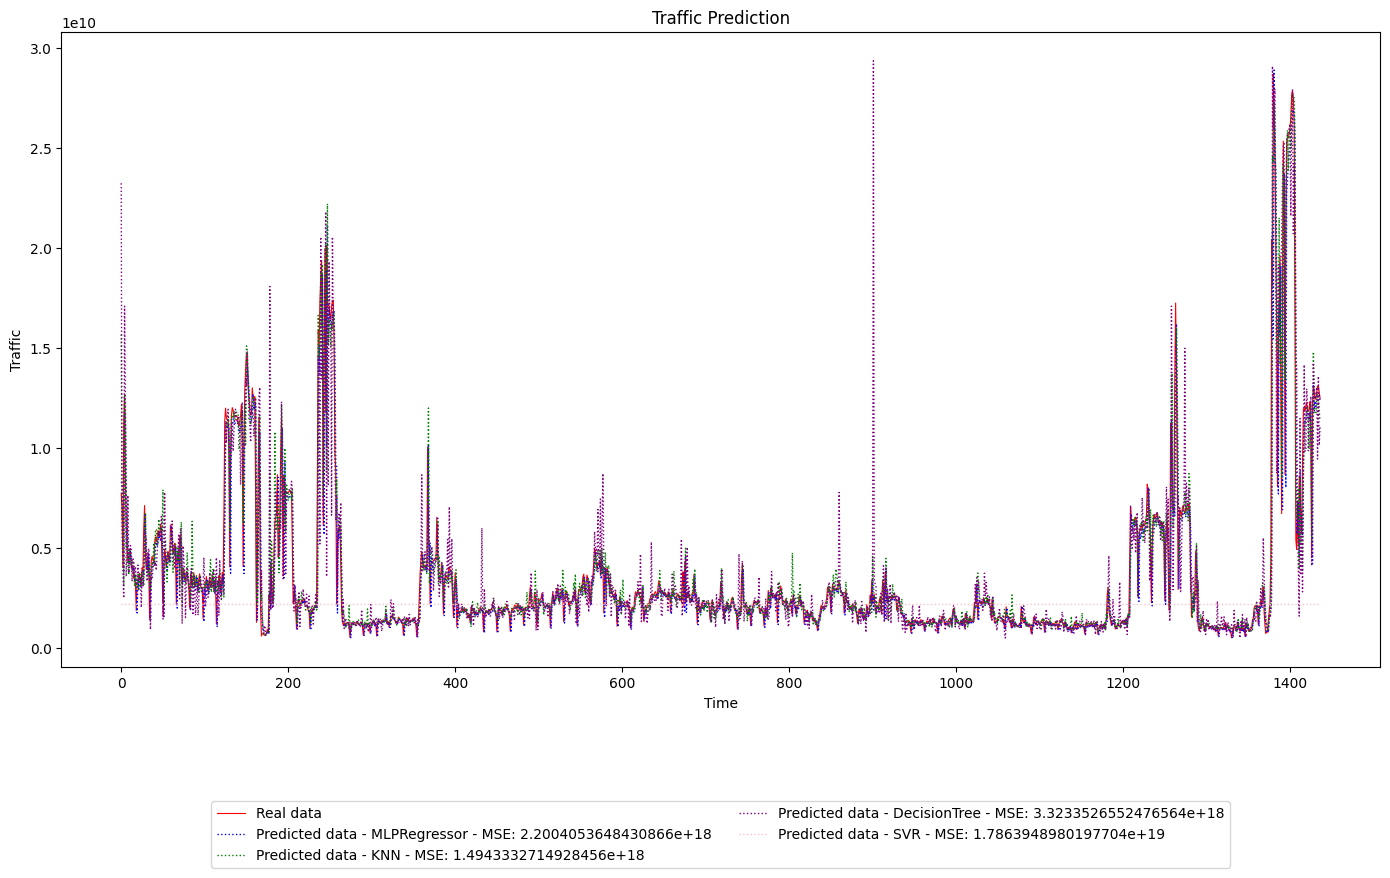

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

from split_data import split_sequence
import warnings 

SEED = 42

warnings.filterwarnings("ignore")

n_steps = 3

colors = ["blue", "green", "purple", "pink"]

classifiers = {
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(4,), activation='identity', max_iter=1000, warm_start=True, early_stopping=True, random_state=SEED),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=SEED),
    "SVR": SVR()
}

dir_name = "WASK"
X_all = import_dataset(dir_name)

X, y = split_sequence(X_all[:29].reshape(-1),  n_steps=n_steps)
X_test, y_test = split_sequence(X_all[30], n_steps=n_steps)

plt.figure(figsize=(14,9))
plt.plot(y_test, label="Real data", color="red", linewidth=0.8)

for clf_id, clf_name in enumerate(classifiers):
    model = classifiers[clf_name].fit(X, y)
    pred = model.predict(X_test)
    mse = mean_squared_error(pred, y_test) 

    plt.plot(pred, label=f"Predicted data - {clf_name} - MSE: {mse}", color = colors[clf_id], linewidth=1, linestyle="dotted")
    plt.title("Traffic Prediction")
    plt.xlabel("Time")
    plt.ylabel("Traffic")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.tight_layout()
plt.show()


In [18]:
dir_name = "WASK"
X_all = import_dataset(dir_name)
X_train = X_all[:29].reshape(-1)
print(X_train.shape)

Skip due incorrect format
Skip due incorrect format
(41760,)
